# MASINSKO UCENJE PRVI PROJEKAT
---
*Nada Jovanovic 1618*    
*Milica Jovanovic 1636*  



 ## Import
 ___

In [298]:
from matplotlib import pyplot
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, auc

In [222]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



## Dataset
___
Dataset ukupno ima 16 fičera i to:  
- 3 kategorička
- 3 numerička
- 10 binarna

| Name  | Feature Type | Description  | Values  |
|---|---|---|---|
|Diagnosis|Feature	Categorical|specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any| from DGN1 to DGN8|
|PRE7  | Feature	Binary  |  Pain before surgery | (T,F)   |
|PRE4  | Feature	Continuous  | Forced vital capacity - FVC  |   (numeric) |
|PRE5 | Feature	Continuous  | Volume that has been exhaled at the end of the first second of forced expiration - FEV1   |(numeric)|
|PRE6|Feature	Categorical  |  Performance status - Zubrod scale | (PRZ2,PRZ1,PRZ0)  |
|PRE7|Feature	Binary  |  Pain before surgery |   (T,F)   |
|PRE8|Feature	Binary  | Haemoptysis before surgery  |  (T,F) |
|PRE9|Feature	Binary  | Dyspnoea before surgery  | (T,F)  |
|PRE10|Feature	Binary|Cough before surgery|(T,F)|
|PRE11|Feature	Binary|Weakness before surgery|(T,F)|
|PRE14|Feature	Categorical|T in clinical TNM - size of the original tumour|from OC11 (smallest) to OC14 (largest)|
|PRE17|Feature	Binary|Type 2 DM - diabetes mellitus|(T,F)|
|PRE19|Feature	Binary|MI up to 6 months|(T,F)|
|PRE25|Feature	Binary|PAD - peripheral arterial diseases|(T,F)|
|PRE30|Feature	Binary|Smoking|(T,F)|
|PRE32|Feature	Binary|Asthma|(T,F)|
|AGE|Feature	Integer|Age	Age at surgery|(numeric)|
|**Risk1Yr**|**Target	Binary**|**1 year survival period - (T)rue value if died**|**(T,F)** |	  
	  


In [223]:
data = pd.read_csv("data.csv")
data1 = pd.read_csv("data.csv")
data.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


### Vizuelni prikaz podataka

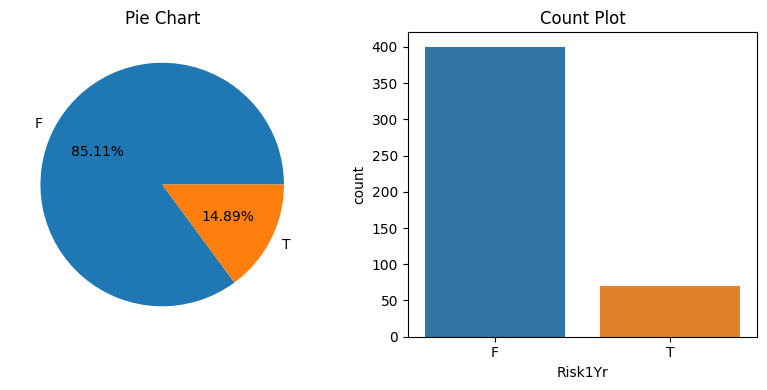

Risk1Yr
F    400
T     70
Name: count, dtype: int64

In [224]:
fig, axes = pyplot.subplots(1, 2, figsize=(8, 4))

axes[0].pie(data['Risk1Yr'].value_counts(), labels=['F', 'T'], autopct='%1.2f%%')
axes[0].set_title('Pie Chart')

sns.countplot(x="Risk1Yr", data=data, ax=axes[1], order=['F', 'T'], hue_order=['F', 'T'], hue="Risk1Yr", legend=False)
axes[1].set_title('Count Plot')

pyplot.tight_layout()
pyplot.show()

data['Risk1Yr'].value_counts()

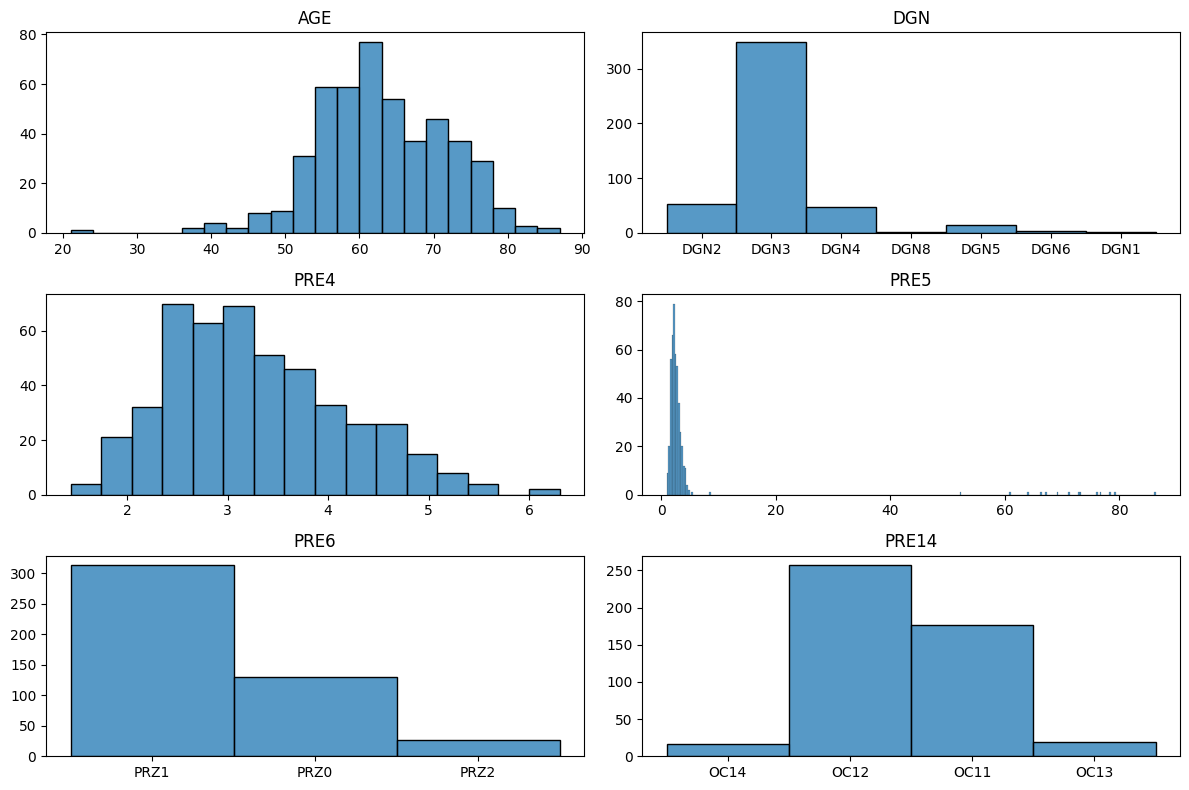

In [225]:
columns = ['AGE', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE14']

fig, axes = pyplot.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

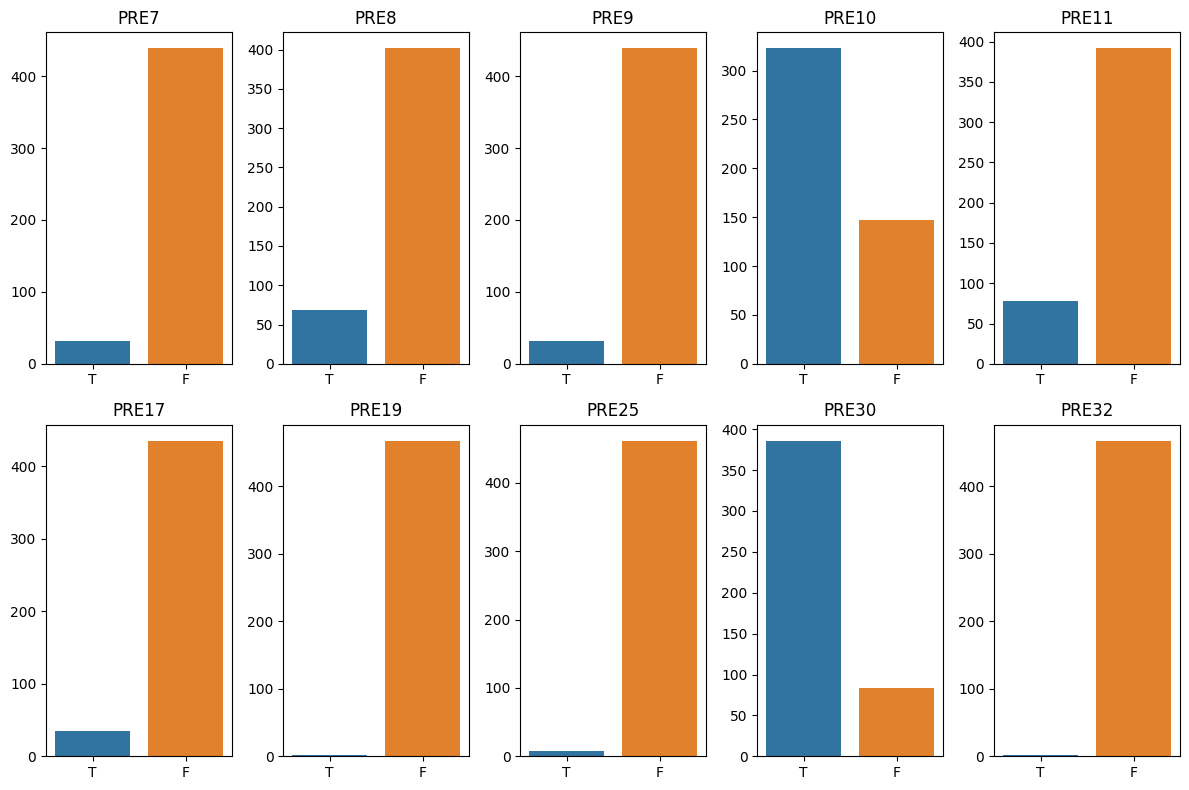

In [226]:
columns_bin = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25','PRE30','PRE32']

fig, axes = pyplot.subplots(2, 5, figsize=(12, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns_bin):
    sns.countplot(x=column_name, data=data, ax=axes[i], order=['T', 'F'], hue_order=['T', 'F'], hue=column_name, legend=False)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()


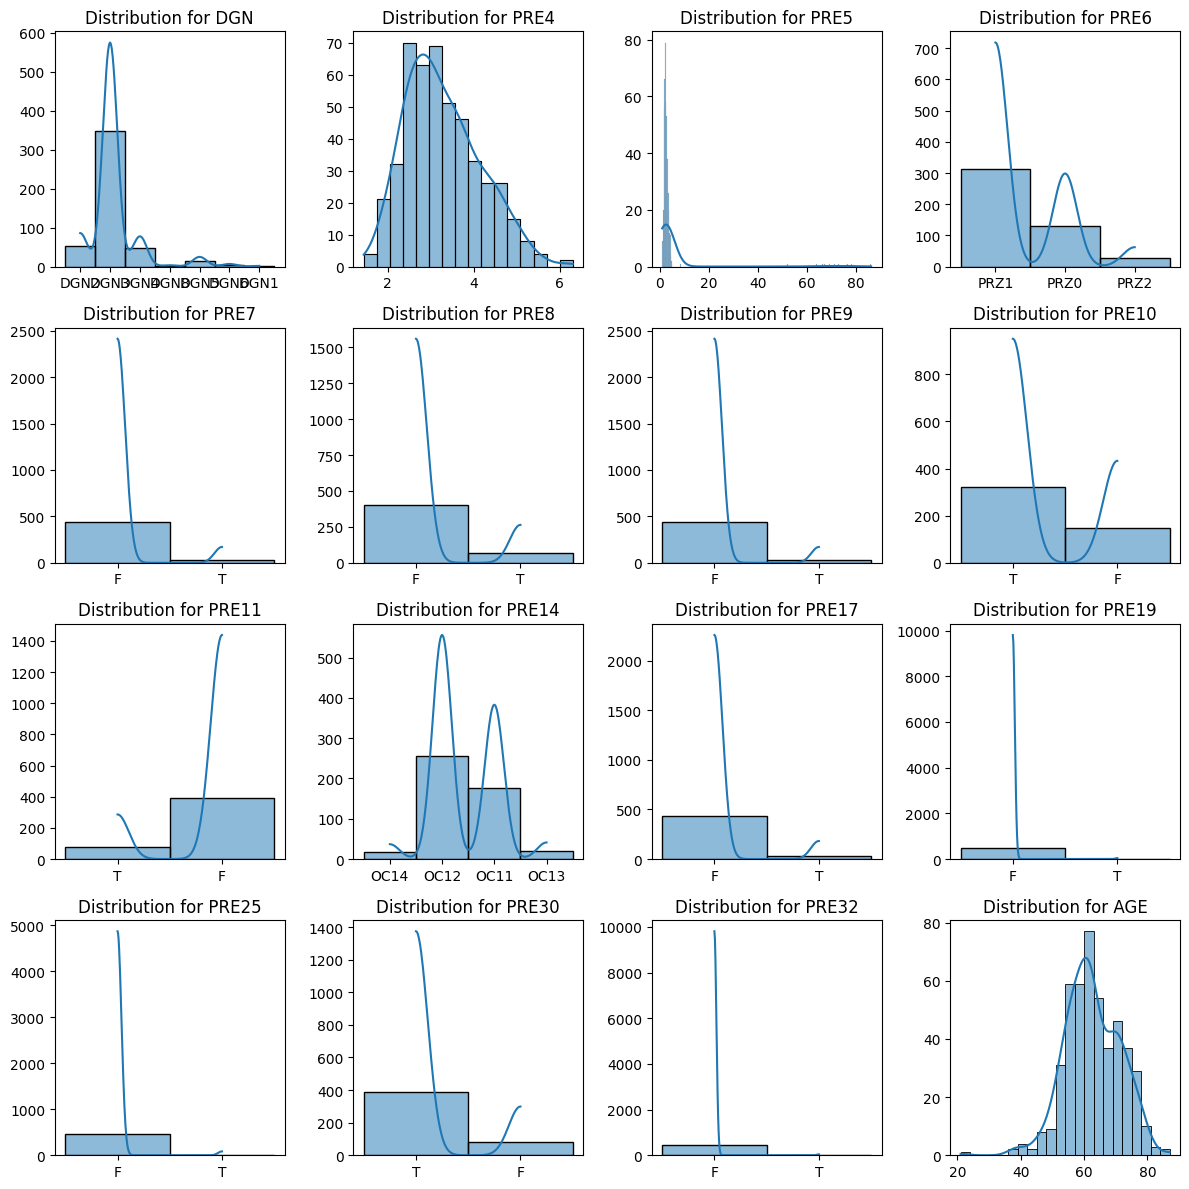

In [227]:
fig, axes = pyplot.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    sns.histplot(x=column, data=data, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution for {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

### Vizuelni prikaz u odnusu na target 

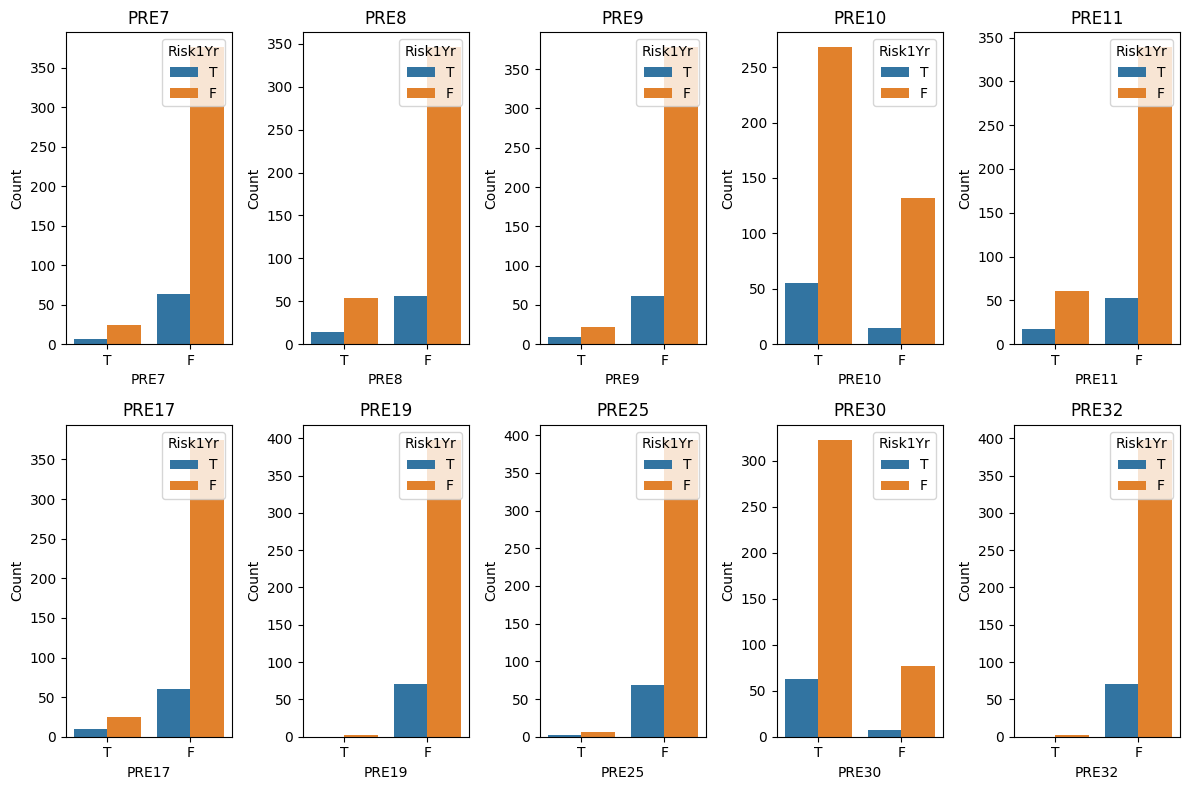

In [228]:
fig, axes = pyplot.subplots(2, 5, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(columns_bin): 
    sns.countplot(x=column, hue='Risk1Yr', data=data, ax=axes[i], order=['T', 'F'], hue_order=['T', 'F'])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Risk1Yr', loc='upper right')

pyplot.tight_layout()
pyplot.show()


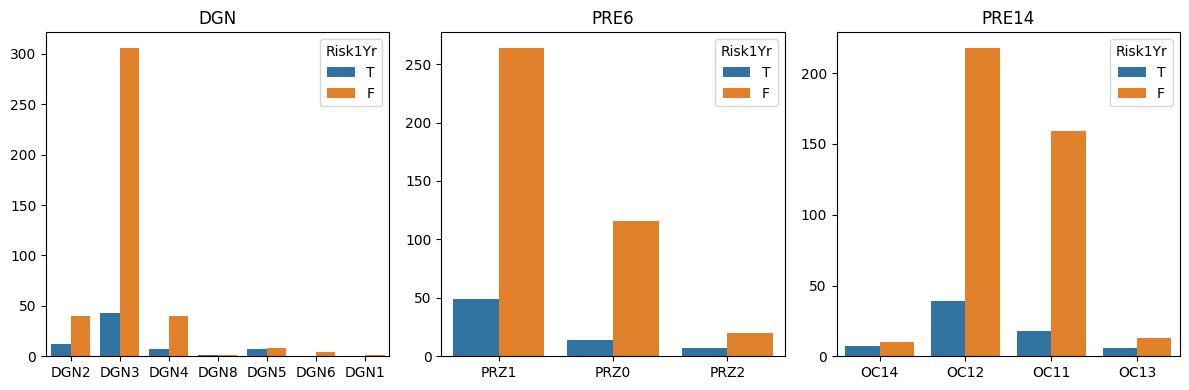

In [229]:
columns_cat = ['DGN', 'PRE6', 'PRE14']

fig, axes = pyplot.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns_cat):
    sns.countplot(x=column_name,  hue='Risk1Yr', data=data, ax=axes[i], hue_order=['T', 'F'])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

In [230]:
# data1 = data1.drop(columns=['PRE32', 'PRE19', 'PRE25'])
# data1

## Transforamcija podataka

Provera da li postoje duplikati u datasetu.

In [231]:
print("Number Of Rows In The Original DataFrame:", len(data))
print("Number Of Rows After Deduping:", len(data.drop_duplicates()))

Number Of Rows In The Original DataFrame: 470
Number Of Rows After Deduping: 470


In [232]:
data.info()
data.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470,470.000000,470.000000,470,470,470,470,470,470,470,470,470,470,470,470,470.000000,470
unique,7,NaN,NaN,3,2,2,2,2,2,4,2,2,2,2,2,NaN,2
top,DGN3,NaN,NaN,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,NaN,F
freq,349,NaN,NaN,313,439,402,439,323,392,257,435,468,462,386,468,NaN,400
mean,NaN,3.281638,4.568702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.534043,NaN
std,NaN,0.871395,11.767857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.706902,NaN
min,NaN,1.440000,0.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN
25%,NaN,2.600000,1.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN
50%,NaN,3.160000,2.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,NaN
75%,NaN,3.807500,3.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN


Kao što se vidi iz priloženog, potrebno transformisati 14 kolona.  

Transforamcije se vrši korišćenjem **pandas** biblioteke tačnije uz pomoć funkcija `get_dummies` i `replace`

In [277]:
labels = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17','PRE30','Risk1Yr','PRE32', 'PRE19', 'PRE25']
data2 = pd.get_dummies(data=data1, columns=['DGN'], dtype=int)

data2 = pd.get_dummies(data=data2, columns=labels, drop_first=True)

scale_mapper = {'OC11':1,
 'OC12':2,
 'OC13':3,
 'OC14':4 }

data2["PRE14"] = data2["PRE14"].replace(scale_mapper)

scale_mapper2 = {'PRZ0':1,
 'PRZ1':2,
 'PRZ2':3}

data2["PRE6"] = data2["PRE6"].replace(scale_mapper2)
print("Izgled podataka posle transformacije:")
data2.head()


Izgled podataka posle transformacije:


,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,...,PRE8_T,PRE9_T,PRE10_T,PRE11_T,PRE17_T,PRE30_T,Risk1Yr_T,PRE32_T,PRE19_T,PRE25_T
0,2.88,2.16,2,4,60,0,1,0,0,0,...,False,False,True,True,False,True,False,False,False,False
1,3.40,1.88,1,2,51,0,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False
2,2.76,2.08,2,1,59,0,0,1,0,0,...,False,False,True,False,False,True,False,False,False,False
3,3.68,3.04,1,1,54,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2.44,0.96,3,1,73,0,0,1,0,0,...,True,False,True,True,False,True,True,False,False,False


In [234]:
data2.info()
data2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRE4       470 non-null    float64
 1   PRE5       470 non-null    float64
 2   PRE6       470 non-null    int64  
 3   PRE14      470 non-null    int64  
 4   AGE        470 non-null    int64  
 5   DGN_DGN1   470 non-null    int32  
 6   DGN_DGN2   470 non-null    int32  
 7   DGN_DGN3   470 non-null    int32  
 8   DGN_DGN4   470 non-null    int32  
 9   DGN_DGN5   470 non-null    int32  
 10  DGN_DGN6   470 non-null    int32  
 11  DGN_DGN8   470 non-null    int32  
 12  PRE7_T     470 non-null    bool   
 13  PRE8_T     470 non-null    bool   
 14  PRE9_T     470 non-null    bool   
 15  PRE10_T    470 non-null    bool   
 16  PRE11_T    470 non-null    bool   
 17  PRE17_T    470 non-null    bool   
 18  PRE30_T    470 non-null    bool   
 19  Risk1Yr_T  470 non-null    bool   
 20  PRE32_T   

,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.00000,470.000000,470.000000,470.000000
mean,3.281638,4.568702,1.780851,1.736170,62.534043,0.002128,0.110638,0.742553,0.10000,0.031915,0.008511,0.004255
std,0.871395,11.767857,0.535375,0.702243,8.706902,0.046127,0.314018,0.437693,0.30032,0.175961,0.091958,0.065163
min,1.440000,0.960000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.600000,1.960000,1.000000,1.000000,57.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3.160000,2.400000,2.000000,2.000000,62.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,3.807500,3.080000,2.000000,2.000000,69.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,6.300000,86.300000,3.000000,4.000000,87.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


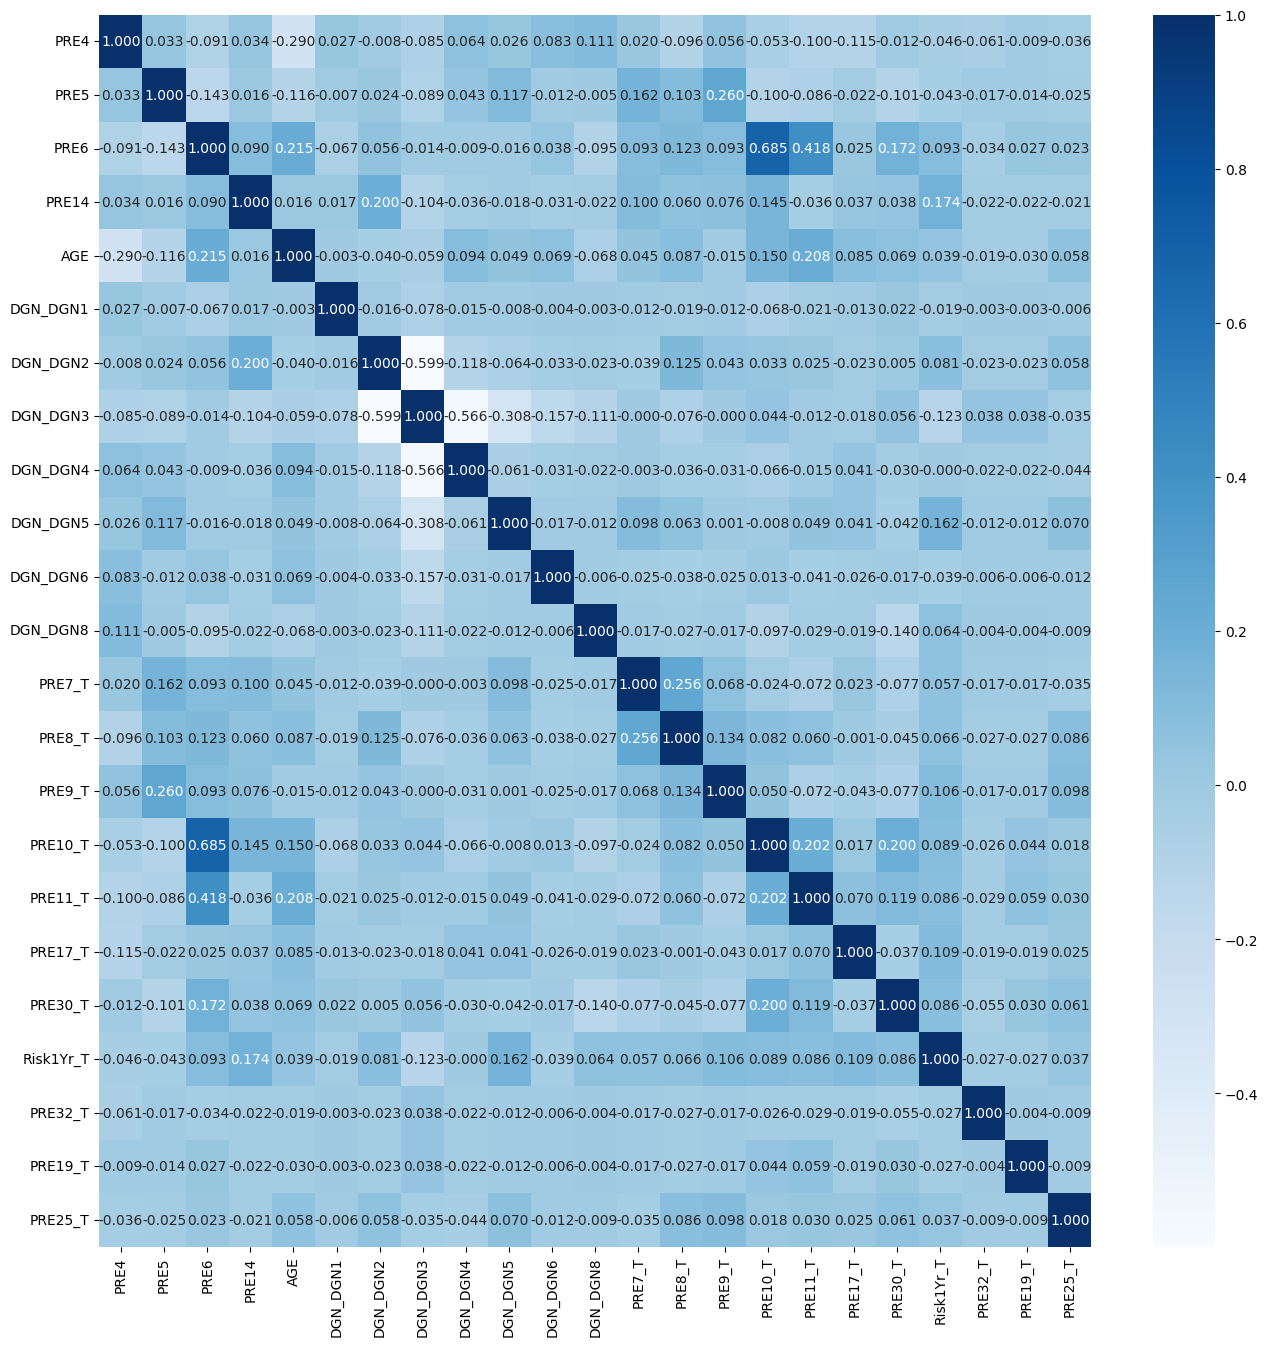

In [235]:
df_corr = data2.corr()
pyplot.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
pyplot.show()


Na osnovu korelacije nije moguće iznaciti nijednu kolonu iz dataseta. 

## Modeli pre balansiranja


In [276]:
data_features = data2.drop('Risk1Yr_T', axis=1)
target = data2['Risk1Yr_T']

print(data_features.head())



   PRE4  PRE5  PRE6  PRE14  AGE  DGN_DGN1  DGN_DGN2  DGN_DGN3  DGN_DGN4  \
0  2.88  2.16     2      4   60         0         1         0         0   
1  3.40  1.88     1      2   51         0         0         1         0   
2  2.76  2.08     2      1   59         0         0         1         0   
3  3.68  3.04     1      1   54         0         0         1         0   
4  2.44  0.96     3      1   73         0         0         1         0   

   DGN_DGN5  ...  PRE7_T  PRE8_T  PRE9_T  PRE10_T  PRE11_T  PRE17_T  PRE30_T  \
0         0  ...   False   False   False     True     True    False     True   
1         0  ...   False   False   False    False    False    False     True   
2         0  ...   False   False   False     True    False    False     True   
3         0  ...   False   False   False    False    False    False    False   
4         0  ...   False    True   False     True     True    False     True   

   PRE32_T  PRE19_T  PRE25_T  
0    False    False    False  
1    F

In [275]:

scaler = StandardScaler()
scale_cols = ['AGE', 'PRE4', 'PRE5']
data_features[scale_cols] = scaler.fit_transform(data_features[scale_cols])
data_features.head()

,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,...,PRE7_T,PRE8_T,PRE9_T,PRE10_T,PRE11_T,PRE17_T,PRE30_T,PRE32_T,PRE19_T,PRE25_T
0,-0.461405,-0.204903,2,4,-0.291348,0,1,0,0,0,...,False,False,False,True,True,False,True,False,False,False
1,0.135975,-0.228722,1,2,-1.326113,0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
2,-0.599262,-0.211708,2,1,-0.406322,0,0,1,0,0,...,False,False,False,True,False,False,True,False,False,False
3,0.457641,-0.130043,1,1,-0.981191,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,-0.966881,-0.306984,3,1,1.203311,0,0,1,0,0,...,False,True,False,True,True,False,True,False,False,False


In [237]:

results = {
    'KNN': {
    },
    'Random Forest': {
    },
    'Logistic Regression':{
    },
    "LinearSVC":{
    },
    "BernoulliNB":{
    },
    'DecisionTree':{
    },
    'XGBoost':{
    }
}

In [238]:

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=42)

print(f"Broj uzoraka u trening skupu podataka: {len(data_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(data_test)}")



Broj uzoraka u trening skupu podataka: 376
Broj uzoraka u test skupu podataka: 94


In [239]:
def score(target_test, model_pred, model):
    accuracy = accuracy_score(target_test, model_pred)
    f1 = f1_score(target_test, model_pred)
    precision = precision_score(target_test, model_pred, zero_division=1)
    recall = recall_score(target_test, model_pred)
    conf_matrix = confusion_matrix(y_true=target_test, y_pred=model_pred)
    TN, FP, FN, TP = conf_matrix.ravel()

    print(model)
    print("--------------------------------------")
    print("Accuracy :", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    pyplot.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
    pyplot.xlabel('Predicted')
    pyplot.ylabel('Actual')
    pyplot.title('Confusion Matrix')
    pyplot.show()
    print("True negative: ", TN)
    print("False negative: ", FN)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("--------------------------------------")

    return accuracy

def roc_plot(model_pred, model_names, target_test, atribut):
    pyplot.figure(figsize=(10, 8))

    for model, name in zip(model_pred, model_names):       
        fpr, tpr, _ = roc_curve(target_test, model)
        roc_auc = auc(fpr, tpr)
        pyplot.plot(fpr, tpr, label=f'{name} {atribut}(AUC = {roc_auc:.3f})')

    pyplot.plot([0, 1], [0, 1], linestyle='--', color='gray')

    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title('Receiver Operating Characteristic (ROC) Curves')
    pyplot.legend()

    pyplot.show()

Funkcija za kros validaciju modela:

In [240]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

def cv_results(model_name, model, data_features, target, cv):
    cv_results = cross_validate(model, data_features, target, cv=cv, scoring='accuracy')
    mean = np.mean(cv_results['test_score'])
    print(f"{model_name} cross validation accuracy: ", cv_results['test_score'], "------> mean:", mean) 
    print("--------------------------------------")
    return mean


### Random Forest

Random Forest
--------------------------------------
Accuracy : 0.7872340425531915
F1 Score:  0.0
Precision:  0.0
Recall:  0.0


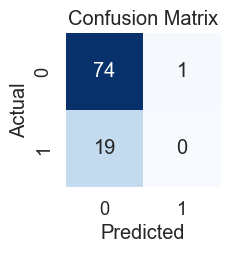

Random Forest cross validation accuracy:  [0.87234043 0.85106383 0.78723404 0.89361702 0.95744681 0.78723404
 0.87234043 0.72340426 0.85106383 0.91489362] ------> mean: 0.851063829787234
--------------------------------------


In [241]:
rf_classifier = RandomForestClassifier()

rf_model = rf_classifier.fit(data_train, target_train)
rf_pred = rf_model.predict(data_test)

results['Random Forest']['basic'] = score(target_test, rf_pred, "Random Forest")
results['Random Forest']['cross'] =  cv_results("Random Forest", rf_classifier, data_features, target, kfold)


In [242]:
rf_pred_cv = cross_val_predict(rf_model, data_test, target_test, cv=kfold)
score(target_test, rf_pred_cv, "Random Forest Cross Validate")

Random Forest Cross Validate
--------------------------------------
Accuracy : 0.8297872340425532
F1 Score:  0.2727272727272727
Precision:  1.0
Recall:  0.15789473684210525
Confuse matrix:
[[75  0]
 [16  3]]
--------------------------------------


0.8297872340425532

### K-Nearest Neighbors


KNN
--------------------------------------
Accuracy : 0.7978723404255319
F1 Score:  0.0
Precision:  1.0
Recall:  0.0


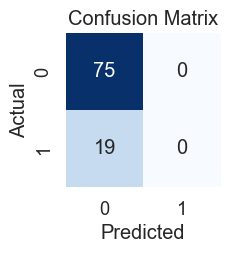

True negative:  75
False negative:  19
True positive:  0
False positive:  0
--------------------------------------
KNN cross validation accuracy:  [0.87234043 0.82978723 0.78723404 0.89361702 0.9787234  0.78723404
 0.89361702 0.72340426 0.82978723 0.91489362] ------> mean: 0.851063829787234
--------------------------------------


In [243]:

from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=8)

knn_model = nearest_neighbors.fit(data_train,target_train)

predNN = knn_model.predict(data_test)

results['KNN']['basic'] = score(target_test, predNN, "KNN")
results['KNN']['cross'] =  cv_results("KNN", nearest_neighbors,data_features, target, kfold)


### Logistic Regression

Logistic Regression
--------------------------------------
Accuracy : 0.8085106382978723
F1 Score:  0.1
Precision:  1.0
Recall:  0.05263157894736842
Confuse matrix:
[[75  0]
 [18  1]]
--------------------------------------


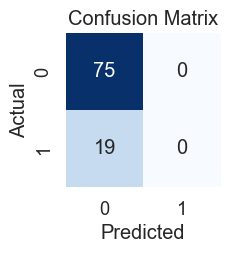

True negative:  75
False negative:  19
True positive:  0
False positive:  0
--------------------------------------
Logistic Regression cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.89361702 0.93617021 0.74468085
 0.89361702 0.74468085 0.85106383 0.91489362] ------> mean: 0.8446808510638298
--------------------------------------


In [244]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)

lr_model = logistic_regression.fit(data_train, target_train)

pred_lr = lr_model.predict(data_test)

results['Logistic Regression']['basic'] = score(target_test, pred_lr, "Logistic Regression")
results['Logistic Regression']['cross'] =  cv_results("Logistic Regression", logistic_regression,data_features, target, kfold)


### LinearSVC

LinearSVC
--------------------------------------
Accuracy : 0.7978723404255319
F1 Score:  0.17391304347826086
Precision:  0.5
Recall:  0.10526315789473684
Confuse matrix:
[[73  2]
 [17  2]]
--------------------------------------


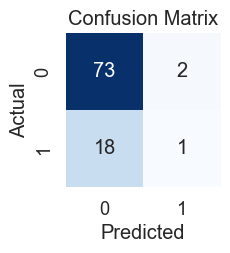

True negative:  73
False negative:  18
True positive:  1
False positive:  2
--------------------------------------
LinearSVC cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.87234043 0.95744681 0.74468085
 0.87234043 0.74468085 0.87234043 0.91489362] ------> mean: 0.8446808510638297
--------------------------------------


In [245]:
svc_model = LinearSVC( C=1.0, random_state=0,  dual='auto')

pred = svc_model.fit(data_train, target_train).predict(data_test)

results['LinearSVC']['basic'] = score(target_test, pred, "LinearSVC")
results['LinearSVC']['cross'] =  cv_results("LinearSVC", svc_model,data_features, target, kfold)


### Naive Bayes


BernoulliNB
--------------------------------------
Accuracy : 0.7978723404255319
F1 Score:  0.17391304347826086
Precision:  0.5
Recall:  0.10526315789473684
Confuse matrix:
[[73  2]
 [17  2]]
--------------------------------------


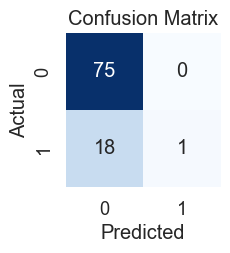

True negative:  75
False negative:  18
True positive:  1
False positive:  0
--------------------------------------
BernoulliNB cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.85106383 0.9787234  0.74468085
 0.87234043 0.72340426 0.82978723 0.91489362] ------> mean: 0.8382978723404255
--------------------------------------


In [246]:
nb_classifer = BernoulliNB()

model = nb_classifer.fit(data_train, target_train)
pred = model.predict(data_test)

results['BernoulliNB']['basic'] = score(target_test, pred,"BernoulliNB" )
results['BernoulliNB']['cross'] =  cv_results("BernoulliNB", model,data_features, target, kfold)



### DecisionTreeClassifier

DecisionTree
--------------------------------------
Accuracy : 0.7021276595744681
F1 Score:  0.125
Precision:  0.15384615384615385
Recall:  0.10526315789473684


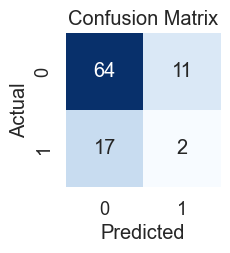

DecisionTree cross validation accuracy:  [0.78723404 0.70212766 0.78723404 0.80851064 0.85106383 0.68085106
 0.78723404 0.72340426 0.80851064 0.80851064] ------> mean: 0.774468085106383
--------------------------------------


In [247]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

results['DecisionTree']['basic'] = score(target_test, predDT,"DecisionTree")
results['DecisionTree']['cross'] =  cv_results("DecisionTree", decisionTree,data_features, target, kfold)


### XGBoost 

XGBoost
--------------------------------------
Accuracy : 0.8191489361702128
F1 Score:  0.1904761904761905
Precision:  1.0
Recall:  0.10526315789473684


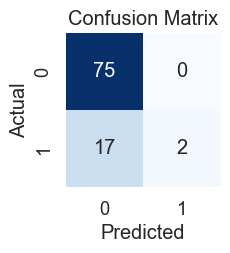

True negative:  75
False negative:  17
True positive:  2
False positive:  0
--------------------------------------
XGBoost cross validation accuracy:  [0.85106383 0.78723404 0.82978723 0.82978723 0.91489362 0.80851064
 0.87234043 0.74468085 0.85106383 0.89361702] ------> mean: 0.8382978723404255
--------------------------------------


In [248]:
xgb_classifier = XGBClassifier(objective='binary:logitraw')

xgb_model = xgb_classifier.fit(data_train,target_train)

predXGB = xgb_model.fit(data_train,target_train).predict(data_test)

results['XGBoost']['basic'] = score(target_test, predXGB, "XGBoost")
results['XGBoost']['cross'] =  cv_results("XGBoost", xgb_classifier,data_features, target, kfold)



### Rezultati pre balansitanja dataseta:

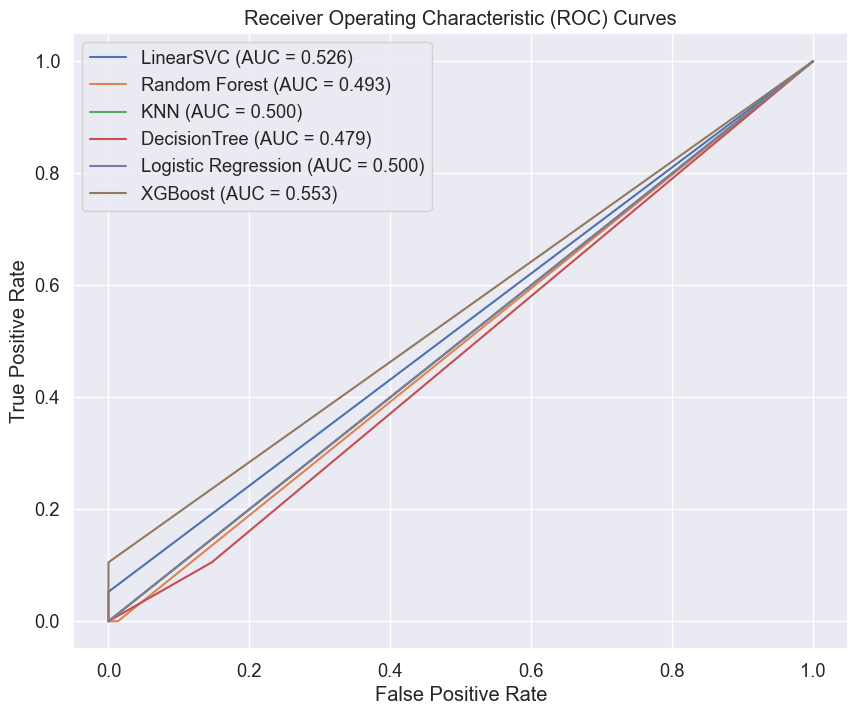

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.787234,0.808511,0.797872,0.797872,0.702128,0.819149
cross,0.851064,0.851064,0.844681,0.844681,0.838298,0.774468,0.838298
balanced,0.81875,0.9,0.750000,0.775,0.793750,0.85625,0.843750
balanced-cross,0.76625,0.87375,0.713750,0.70875,0.686250,0.79375,0.873750
matrix,"[[55, 21], [8, 76]]","[[66, 10], [3, 81]]",NaN,"[[66, 10], [26, 58]]",NaN,"[[62, 14], [9, 75]]",NaN


In [249]:
model_pred = [pred, rf_pred,predNN,predDT,pred_lr, predXGB]
model_names = ['LinearSVC','Random Forest','KNN', 'DecisionTree', 'Logistic Regression','XGBoost']

roc_plot(model_pred, model_names, target_test, "")

pd.DataFrame.from_dict(results)


## Balansiranje dataseta

Za balansiranje dataseta korisi se SMOTE koji vrsi oversempling klase sa manjim brojem instanci.

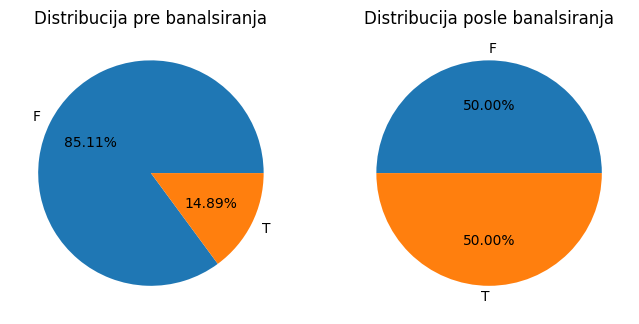

Risk1Yr_T
False    400
True      70
Name: count, dtype: int64
----------------------------
Risk1Yr_T
False    400
True     400
Name: count, dtype: int64


In [250]:
sm = SMOTE()

data_features_res, target_res = sm.fit_resample(data_features, target)

fig, axes = pyplot.subplots(1, 2, figsize=(8, 4))

axes[0].pie(target.value_counts(), labels=['F', 'T'],autopct='%1.2f%%')
axes[0].set_title('Distribucija pre banalsiranja')

axes[1].pie(target_res.value_counts(), labels=['F', 'T'], autopct='%1.2f%%')
axes[1].set_title('Distribucija posle banalsiranja')

pyplot.show()

print(target.value_counts())
print("----------------------------")
print(target_res.value_counts())



Podela balansiranih podataka na train i test:

In [251]:

data_train_balansed, data_test_balansed, target_train_balansed, target_test_balansed = train_test_split(data_features_res, target_res, test_size=0.2, random_state=42)

## Modeli posle balansiranja

LinearSVC
--------------------------------------
Accuracy : 0.8125
F1 Score:  0.8192771084337348
Precision:  0.8292682926829268
Recall:  0.8095238095238095
Confuse matrix:
[[62 14]
 [16 68]]
--------------------------------------


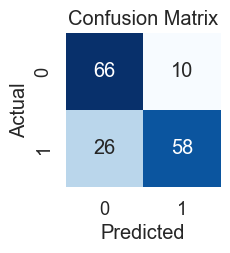

True negative:  66
False negative:  26
True positive:  58
False positive:  10
--------------------------------------
LinearSVC cross validation accuracy:  [0.775  0.825  0.6875 0.625  0.7375 0.7    0.7625 0.6125 0.625  0.7375] ------> mean: 0.70875
--------------------------------------
Random Forest
--------------------------------------
Accuracy : 0.9125
F1 Score:  0.9204545454545455
Precision:  0.8804347826086957
Recall:  0.9642857142857143


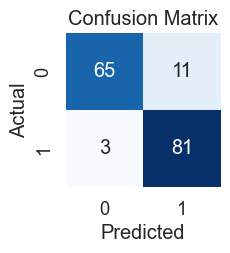

True negative:  65
False negative:  3
True positive:  81
False positive:  11
--------------------------------------
Random Forest cross validation accuracy:  [0.85   0.925  0.9125 0.8375 0.8625 0.9    0.9    0.875  0.875  0.8625] ------> mean: 0.8800000000000001
--------------------------------------
KNN
--------------------------------------
Accuracy : 0.81875
F1 Score:  0.839779005524862
Precision:  0.7835051546391752
Recall:  0.9047619047619048


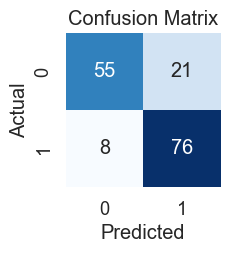

True negative:  55
False negative:  8
True positive:  76
False positive:  21
--------------------------------------
KNN cross validation accuracy:  [0.7625 0.825  0.775  0.675  0.7375 0.7875 0.8125 0.775  0.7125 0.8   ] ------> mean: 0.7662500000000001
--------------------------------------
DecisionTree
--------------------------------------
Accuracy : 0.85625
F1 Score:  0.8670520231213873
Precision:  0.8426966292134831
Recall:  0.8928571428571429


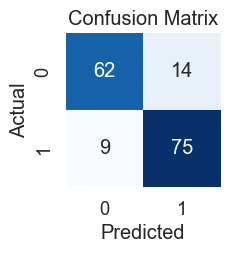

True negative:  62
False negative:  9
True positive:  75
False positive:  14
--------------------------------------
DecisionTree cross validation accuracy:  [0.8375 0.825  0.8    0.725  0.8625 0.7625 0.7375 0.8    0.825  0.7625] ------> mean: 0.79375
--------------------------------------
 BernoulliNB
--------------------------------------
Accuracy : 0.79375
F1 Score:  0.8023952095808383
Precision:  0.8072289156626506
Recall:  0.7976190476190477


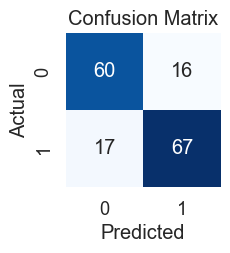

True negative:  60
False negative:  17
True positive:  67
False positive:  16
--------------------------------------
BernoulliNB cross validation accuracy:  [0.7125 0.75   0.6625 0.6375 0.725  0.7    0.725  0.6125 0.625  0.7125] ------> mean: 0.68625
--------------------------------------
Logistic Regression
--------------------------------------
Accuracy : 0.75
F1 Score:  0.7435897435897436
Precision:  0.8055555555555556
Recall:  0.6904761904761905


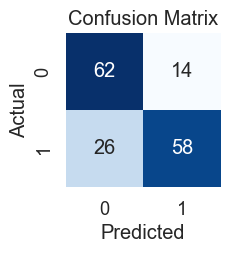

True negative:  62
False negative:  26
True positive:  58
False positive:  14
--------------------------------------
Logistic Regression cross validation accuracy:  [0.7625 0.8375 0.7125 0.6625 0.7125 0.725  0.7625 0.6    0.625  0.7375] ------> mean: 0.71375
--------------------------------------
XGBoost
--------------------------------------
Accuracy : 0.84375
F1 Score:  0.8502994011976047
Precision:  0.8554216867469879
Recall:  0.8452380952380952


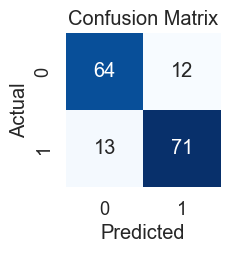

True negative:  64
False negative:  13
True positive:  71
False positive:  12
--------------------------------------
XGBoost cross validation accuracy:  [0.875  0.9125 0.8875 0.8375 0.925  0.8375 0.9125 0.9    0.8    0.85  ] ------> mean: 0.87375
--------------------------------------


In [252]:
pred = svc_model.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['LinearSVC']['balanced'] =score(target_test_balansed, pred, "LinearSVC")
results['LinearSVC']['balanced-cross'] =  cv_results("LinearSVC", svc_model,data_features_res, target_res, kfold)

rf_pred = rf_classifier.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['Random Forest']['balanced'] =score(target_test_balansed, rf_pred, "Random Forest")
results['Random Forest']['balanced-cross'] =  cv_results("Random Forest", rf_classifier,data_features_res, target_res, kfold)

predNN = nearest_neighbors.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['KNN']['balanced'] =score(target_test_balansed, predNN, "KNN")
results['KNN']['balanced-cross'] =  cv_results("KNN", nearest_neighbors,data_features_res, target_res, kfold)

predDT = decisionTree.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['DecisionTree']['balanced'] =score(target_test_balansed, predDT, "DecisionTree")
results['DecisionTree']['balanced-cross'] =  cv_results("DecisionTree", decisionTree,data_features_res, target_res, kfold)

BernoulliNB = nb_classifer.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['BernoulliNB']['balanced'] =score(target_test_balansed, BernoulliNB, " BernoulliNB")
results['BernoulliNB']['balanced-cross'] =  cv_results("BernoulliNB", nb_classifer,data_features_res, target_res, kfold)

pred_lr = logistic_regression.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['Logistic Regression']['balanced'] =score(target_test_balansed, pred_lr, "Logistic Regression")
results['Logistic Regression']['balanced-cross'] =  cv_results("Logistic Regression", logistic_regression,data_features_res, target_res, kfold)

predXGB = xgb_model.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['XGBoost']['balanced'] =score(target_test_balansed, predXGB, "XGBoost")
results['XGBoost']['balanced-cross'] =  cv_results("XGBoost", xgb_classifier,data_features_res, target_res, kfold)




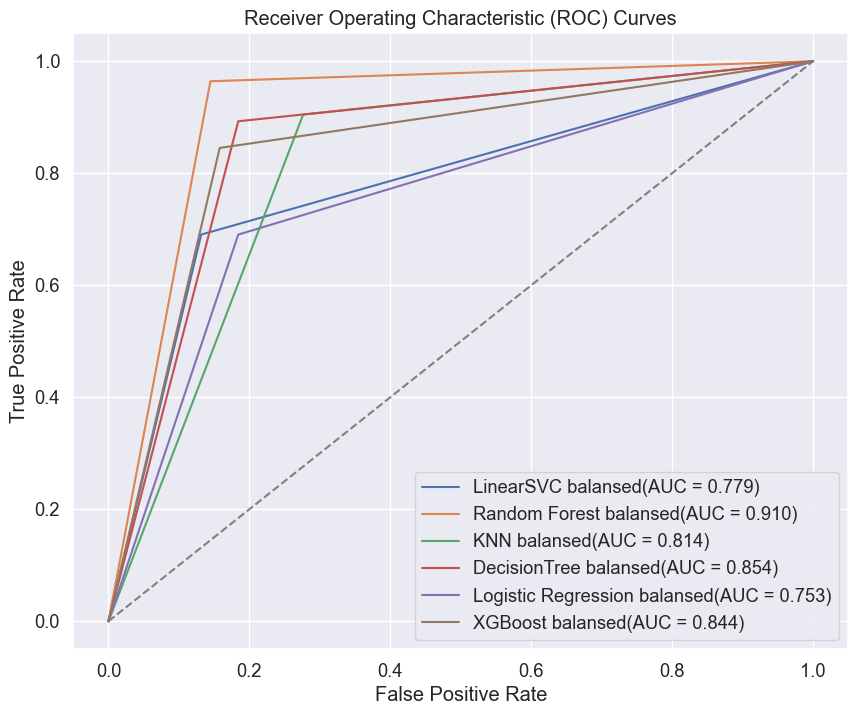

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.787234,0.808511,0.797872,0.797872,0.702128,0.819149
cross,0.848936,0.846809,0.844681,0.844681,0.838298,0.774468,0.838298
balanced,0.81875,0.9125,0.750000,0.775,0.793750,0.85625,0.843750
balanced-cross,0.76625,0.88,0.713750,0.70875,0.686250,0.79375,0.873750
matrix,"[[55, 21], [8, 76]]","[[66, 10], [3, 81]]",NaN,"[[66, 10], [26, 58]]",NaN,"[[62, 14], [9, 75]]",NaN


In [253]:
model_pred = [pred, rf_pred,predNN,predDT,pred_lr, predXGB]

roc_plot(model_pred, model_names, target_test_balansed, "balansed")

pd.DataFrame(results)

## Hiperparametri

One GridSearchCV parameter is worth noting: verbose. While mostly unnecessary, it
can be reassuring during long searching processes to receive an indication that the
search is progressing. The verbose parameter determines the amount of messages
outputted during the search, with 0 showing no output, and 1 to 3 outputting mes‐
sages with increasing detail

**scoring**
Strategy to evaluate the performance of the cross-validated model on the test set.
If scoring represents a single score, one can use:
a single string (see The scoring parameter: defining model evaluation rules);
a callable (see Defining your scoring strategy from metric functions) that returns a single value.
If scoring represents multiple scores, one can use:
a list or tuple of unique strings;
a callable returning a dictionary where the keys are the metric names and the values are the metric scores;
a dictionary with metric names as keys and callables a values.

**n_jobsint**, default=None
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

**cv** int, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:
None, to use the default 5-fold cross validation,
integer, to specify the number of folds in a (Stratified)KFold,
CV splitter,
An iterable yielding (train, test) splits as arrays of indices.
For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with shuffle=False so the splits will be the same across calls.
Refer User Guide for the various cross-validation strategies that can be used here.

In [257]:
def findParameters(model, hyperparameters, key):
    grid_search_cv = GridSearchCV(model, hyperparameters, verbose=2, n_jobs=-1, scoring="accuracy")
    best_model = grid_search_cv.fit(data_train, target_train)
    print(best_model.best_params_)
    best_pred = best_model.predict(data_test)
    
    print("Best parameters: ",best_model.best_params_)
    print("Best score: ",best_model.best_score_)

    results[key]['best'] = best_model.best_score_

### K-Nearest Neighbors

In [258]:
knn_model = KNeighborsClassifier()

knn_hyperparameters = { 'n_neighbors': list(range(2, 21)),
               'weights': ['uniform','distance'],
               'metric': ['minkowski','euclidean','manhattan']}

findParameters(knn_model, knn_hyperparameters, 'KNN')


Fitting 5 folds for each of 114 candidates, totalling 570 fits


{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Best score:  0.8670175438596491


### Hyperparameters of Random Forest Classifier:
1. max_depth: The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.
2. min_sample_split: Parameter that tells the decision tree in a random forest the minimum required number of observations in any given node to split it. Default = 2
3. max_leaf_nodes: This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.
4. min_samples_leaf: This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node. Default = 1
5. n_estimators: Number of trees in the forest.
6. max_sample: The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.
7. max_features: This resembles the number of maximum features provided to each tree in a random forest.
8. bootstrap: Method for sampling data points (with or without replacement). Default = True
9. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [259]:

rf_classifier = RandomForestClassifier()

rf_hyperparameters = {
            'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 800, 1600],
    'criterion': ['gini', 'entropy'],
               }


# manje granice jer predugo traje
#{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 90}
# 0.8390625

# vreme 9min
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
# Best parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
# Best score:  0.8670526315789473

# vreme 26 min
# {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# Best parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# Best score:  0.8696842105263158
#findParameters(rf_classifier, rf_hyperparameters, 'random forest')

### BernoulliNB

alphafloat or array-like of shape (n_features,), default=1.0
Additive (Laplace/Lidstone) smoothing parameter (set alpha=0 and force_alpha=True, for no smoothing).

force_alphabool, default=False
If False and alpha is less than 1e-10, it will set alpha to 1e-10. If True, alpha will remain unchanged. This may cause numerical errors if alpha is too close to 0.

New in version 1.2.

Deprecated since version 1.2: The default value of force_alpha will change to True in v1.4.
binarizefloat or None, default=0.0
Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.

fit_priorbool, default=True
Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

class_priorarray-like of shape (n_classes,), default=None
Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.

In [260]:
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()

nb_hyperparameters = {
    "alpha": [0, 0.1, 1.0],
                      'binarize':[0, 5, 10]
                      }

findParameters(nb_model, nb_hyperparameters, 'BernoulliNB')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'alpha': 0, 'binarize': 5}
Best parameters:  {'alpha': 0, 'binarize': 5}
Best score:  0.8643859649122806


c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


### DecisionTreeClassifier

criterion: string, optional (default=”gini”): The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
random_state: int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

In [261]:
dt_model = DecisionTreeClassifier()

dt_hyperparameters = {
    'max_depth': [2,  5, 8, 16],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,5),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0, 0.1, .01],
    'criterion': ["gini", "entropy"]
                      }

findParameters(dt_model, dt_hyperparameters, 'DecisionTree')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best parameters:  {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score:  0.8697192982456141


### LogisticRegression

penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
Specify the norm of the penalty:
None: no penalty is added;
'l2': add a L2 penalty term and it is the default choice;
'l1': add a L1 penalty term;
'elasticnet': both L1 and L2 penalty terms are added.

Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

In [262]:
lr_model = LogisticRegression()

lr_hyperparameters = {
    'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'penalty':  [None, "l1", "l2", "elasticnet"],
    'C': [100, 10, 1.0, 0.1, 0.01],
                      }

findParameters(lr_model, lr_hyperparameters, 'Logistic Regression')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'C': 100, 'penalty': None, 'solver': 'lbfgs'}
Best parameters:  {'C': 100, 'penalty': None, 'solver': 'lbfgs'}
Best score:  0.8669824561403509


c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\

In [309]:

xgb_classifier = XGBClassifier()

xgb_hyperparameters = {
    'learning_rate': [0.01, 0.1, 0.2, 0.4],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200 , 400 , 600],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5]
}
# {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
# Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
# Best score:  0.8670175438596491

# findParameters(xgb_classifier, xgb_hyperparameters, 'XGBoost')

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
Best score:  0.8670175438596491


### SVC

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples). For an intuitive visualization of different kernel types see Plot classification boundaries with different SVM Kernels.

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features

if float, must be non-negative.

In [310]:
svc_model = SVC()
# degrees = [0, 1, 2, 3, 4, 5, 6]
svc_hyperparameters = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10],
             'kernel': ['rbf','poly','sigmoid', 'linear']}

# findParameters(svc_model, svc_hyperparameters, 'LinearSVC')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [311]:
svc = SVC(C=10, gamma=0.1,probability=True,kernel='rbf')

decisionTree = DecisionTreeClassifier(ccp_alpha=0,
                       criterion='gini', max_depth=16, min_samples_split=4, min_samples_leaf=1, 
                       random_state=0)

rf_classifier = RandomForestClassifier(criterion='gini', max_depth=20, max_features='sqrt',min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, bootstrap=False)

knn=KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

xgb_classifier = XGBClassifier(learning_rate = 0.1, max_depth=7, min_child_weight= 1, n_estimators= 100 , subsample=0.9 )


### PCA

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

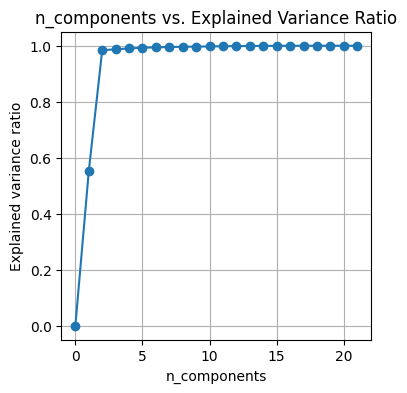

In [312]:
nums = np.arange(22)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(data_features_res)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

pyplot.figure(figsize=(4,4))
pyplot.grid()
pyplot.plot(nums,var_ratio,marker='o')
pyplot.xlabel('n_components')
pyplot.ylabel('Explained variance ratio')
pyplot.title('n_components vs. Explained Variance Ratio')


In [313]:
pca = PCA(n_components=14)
data_features_pca = pca.fit_transform(data_features_res)

data_train_pca, data_test_pca, target_train_pca, target_test_pca = train_test_split(data_features_pca, target_res, test_size=0.2, random_state=42)

rf_classifier.fit(data_train_pca, target_train_pca)
rf_pred = rf_classifier.predict(data_test_pca)
print("random forest accuracy after PCA:  ", (accuracy_score(target_test_pca, rf_pred)))

knn.fit(data_train_pca, target_train_pca)
predNN = knn.predict(data_test_pca)
print("knn accuracy after PCA:  ", (accuracy_score(target_test_pca, predNN)))

predDT = decisionTree.fit(data_train_pca, target_train_pca).predict(data_test_pca)
print("decision tree accuracy after PCA:  ", (accuracy_score(target_test_pca, predDT)))

xgb_model = xgb_model.fit(data_train_pca, target_train_pca)
predXGB = xgb_model.predict(data_test_pca)
print("XGBoost accuracy after PCA:  ", (accuracy_score(target_test_pca, predXGB)))

svc = svc.fit(data_train_pca, target_train_pca)
predSVC = svc.predict(data_test_pca)
print("SVC accuracy after PCA:  ", (accuracy_score(target_test_pca, predSVC)))

results['Random Forest']['pca'] =accuracy_score(target_test_pca, rf_pred)
results['KNN']['pca'] =accuracy_score(target_test_pca, predNN)
results['DecisionTree']['pca'] =accuracy_score(target_test_pca, predDT)
results['XGBoost']['pca'] =accuracy_score(target_test_pca, predXGB)
results['LinearSVC']['pca'] =accuracy_score(target_test_pca, predSVC)

random forest accuracy after PCA:   0.89375
knn accuracy after PCA:   0.89375
decision tree accuracy after PCA:   0.85
XGBoost accuracy after PCA:   0.86875
SVC accuracy after PCA:   0.85625


In [267]:
pd.DataFrame(results)

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.787234,0.808511,0.797872,0.797872,0.702128,0.819149
cross,0.851064,0.851064,0.844681,0.844681,0.838298,0.774468,0.838298
balanced,0.837500,0.900000,0.800000,0.812500,0.818750,0.850000,0.843750
balanced-cross,0.802500,0.897500,0.807500,0.807500,0.770000,0.840000,0.888750
f1,0.000000,0.095238,0.100000,0.173913,0.173913,0.125000,NaN
ROC,0.500000,0.519649,0.526316,0.539298,0.539298,0.479298,NaN
best,0.867018,NaN,0.866982,NaN,0.864386,0.869719,NaN
pca,0.893750,0.887500,NaN,0.856250,NaN,0.850000,0.868750


### Random Forest Feature Importance 

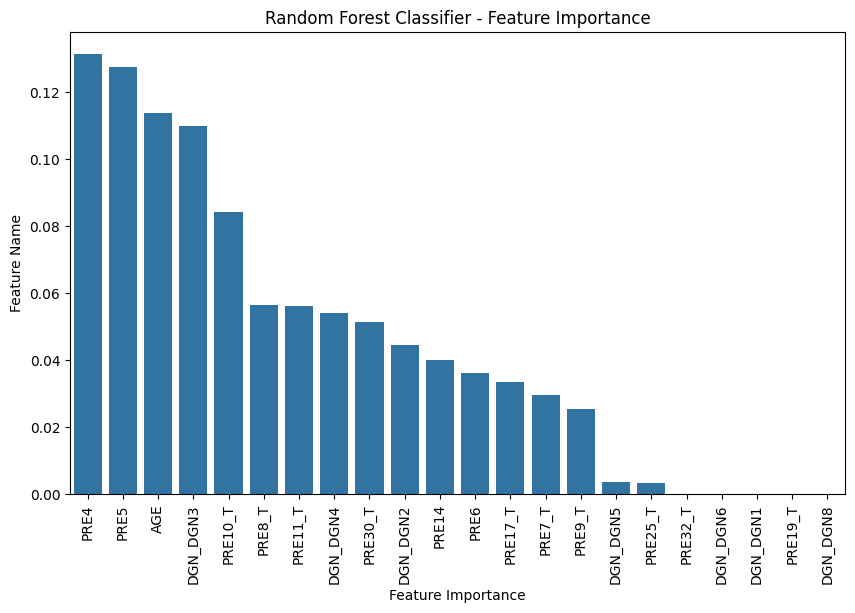

In [314]:
rf_model = rf_classifier.fit(data_train_balansed, target_train_balansed)

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': data_features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

pyplot.figure(figsize=(10, 6))
sns.barplot(y=importance_df['Importance'], x=importance_df['Feature'], orient="v")
pyplot.xticks(rotation=90)
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Feature Name")
pyplot.title("Random Forest Classifier - Feature Importance")
pyplot.show()


In [315]:

important_features_mask = importance_df.where(importance_df['Importance'] > 0.04).dropna().reset_index(drop=True)
important_features_mask = important_features_mask['Feature']

rfi_feature_data = data_features_res[important_features_mask]
rfi_feature_data

,PRE4,PRE5,AGE,DGN_DGN3,PRE10_T,PRE8_T,PRE11_T,DGN_DGN4,PRE30_T,DGN_DGN2,PRE14
0,2.880000,2.160000,60,0,True,False,True,0,True,1,4
1,3.400000,1.880000,51,1,False,False,False,0,True,0,2
2,2.760000,2.080000,59,1,True,False,False,0,True,0,1
3,3.680000,3.040000,54,1,False,False,False,0,False,0,1
4,2.440000,0.960000,73,1,True,True,True,0,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...
795,2.550466,1.787674,69,0,True,False,False,0,True,0,2
796,3.232017,1.905799,57,0,True,False,True,0,True,0,2
797,3.480286,2.454095,81,0,True,False,False,0,True,0,2
798,3.323675,2.291476,71,1,True,True,False,0,True,0,2


In [339]:
rfi_data_train, rf_data_test_balansed, rf_target_train_balansed, rf_target_test_balansed = train_test_split(rfi_feature_data, target_res, test_size=0.2, random_state=42)

print("Original number of features:", data_train_balansed.shape[1])
print("Reduced number of features:", rfi_data_train.shape[1])

def rf_fi_score(model,modelName):
    modelTrained = model.fit(rfi_data_train, rf_target_train_balansed)
    prediction = modelTrained.predict(rf_data_test_balansed)
    print(f"Best {modelName} accuracy : ",accuracy_score(rf_target_test_balansed, prediction, normalize = True))
    results[modelName]['Random Forest Feature Importance'] = accuracy_score(rf_target_test_balansed, prediction, normalize = True)

rf_fi_score(svc,'LinearSVC')
rf_fi_score(decisionTree,"DecisionTree")
rf_fi_score(rf_classifier,"Random Forest")
rf_fi_score(knn,"KNN")
rf_fi_score(xgb_model, "XGBoost")


Original number of features: 22
Reduced number of features: 11
Best LinearSVC accuracy :  0.83125
Best DecisionTree accuracy :  0.83125
Best Random Forest accuracy :  0.85
Best KNN accuracy :  0.84375
Best XGBoost accuracy :  0.825


### XGBoost Feature Importance

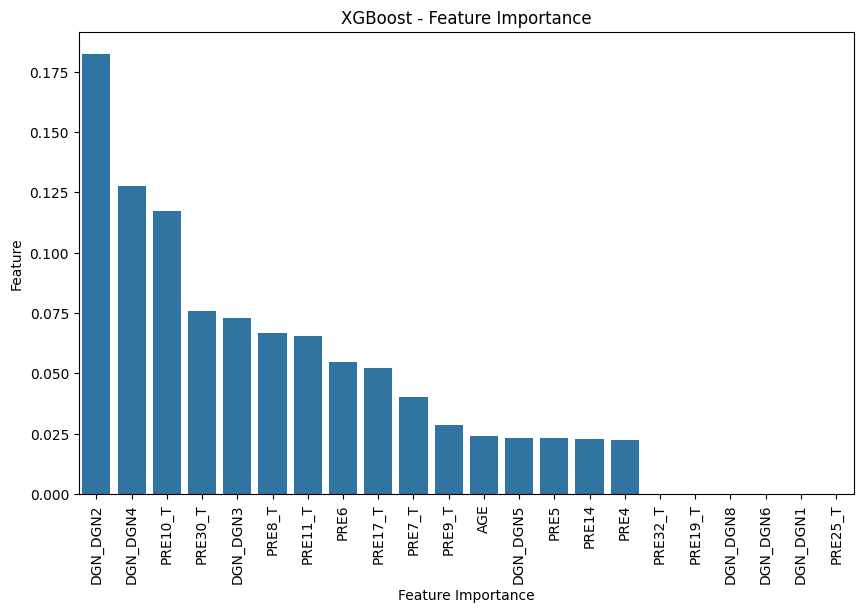

In [317]:
xgb_model = xgb_model.fit(data_train_balansed, target_train_balansed)
# Get feature importance scores
feature_importances = xgb_model.feature_importances_

# Create a DataFrame or Series to display or analyze the feature importance
importance_df = pd.DataFrame({'Feature': data_features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances using Seaborn
pyplot.figure(figsize=(10, 6))
sns.barplot(y=importance_df['Importance'], x=importance_df['Feature'], orient="v")
pyplot.xticks(rotation=90)
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Feature")
pyplot.title("XGBoost - Feature Importance")
pyplot.show()


In [318]:

important_features_mask = importance_df.where(importance_df['Importance'] > 0.05).dropna().reset_index(drop=True)
important_features_mask = important_features_mask['Feature']

xgb_feature_data = data_features_res[important_features_mask]
xgb_feature_data

,DGN_DGN2,DGN_DGN4,PRE10_T,PRE30_T,DGN_DGN3,PRE8_T,PRE11_T,PRE6,PRE17_T
0,1,0,True,True,0,False,True,2,False
1,0,0,False,True,1,False,False,1,False
2,0,0,True,True,1,False,False,2,False
3,0,0,False,False,1,False,False,1,False
4,0,0,True,True,1,True,True,3,False
...,...,...,...,...,...,...,...,...,...
795,0,0,True,True,0,False,False,1,False
796,0,0,True,True,0,False,True,2,True
797,0,0,True,True,0,False,False,1,False
798,0,0,True,True,1,True,False,1,False


In [340]:
xgb_data_train, xgb_data_test_balansed, xgb_target_train_balansed, xgb_target_test_balansed = train_test_split(xgb_feature_data, target_res, test_size=0.2, random_state=42)

print("Original number of features:", data_train_balansed.shape[1])
print("Reduced number of features:", rfi_data_train.shape[1])

def xgb_fi_score(model,modelName):
    modelTrained = model.fit(xgb_data_train, xgb_target_train_balansed)
    prediction = modelTrained.predict(xgb_data_test_balansed)
    print(f"Best {modelName} accuracy : ",accuracy_score(xgb_target_test_balansed, prediction, normalize = True))
    results[modelName]['XGBoost Feature Importance'] = accuracy_score(xgb_target_test_balansed, prediction, normalize = True)

xgb_fi_score(svc,'LinearSVC')
xgb_fi_score(decisionTree,"DecisionTree")
xgb_fi_score(rf_classifier,"Random Forest")
xgb_fi_score(knn,"KNN")
xgb_fi_score(xgb_model, "XGBoost")



Original number of features: 22
Reduced number of features: 11
Best LinearSVC accuracy :  0.8
Best DecisionTree accuracy :  0.76875
Best Random Forest accuracy :  0.8
Best KNN accuracy :  0.7375
Best XGBoost accuracy :  0.75625


### Variance thresholding
Variance thresholding (VT) is one of the most basic approaches to feature selection. It
is motivated by the idea that features with low variance are likely less interesting (and
useful) than features with high variance. 

In [328]:
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=.8)
data_train_VT = thresholder.fit_transform(data_train_balansed)
data_test_VT = thresholder.transform(data_test_balansed)

print("Original number of features:", data_train_balansed.shape[1])
print("Reduced number of features:", data_train_VT.shape[1])

def varianceScore(model,modelName):
    modelTrained = model.fit(data_train_VT,target_train_balansed)
    prediction = modelTrained.predict(data_test_VT)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test_balansed, prediction, normalize = True))
    results[modelName]['VarianceThreshold'] = accuracy_score(target_test_balansed, prediction, normalize = True)

varianceScore(svc,'LinearSVC')
varianceScore(decisionTree,"DecisionTree")
varianceScore(rf_classifier,"Random Forest")
varianceScore(knn,"KNN")
varianceScore(xgb_model, "XGBoost")


Original number of features: 22
Reduced number of features: 2


random forest accuracy after VarianceThreshold:   0.6875
knn accuracy after VarianceThreshold:   0.71875
decision tree accuracy after VarianceThreshold:   0.69375
XGBoost accuracy after VarianceThreshold:   0.725


In [334]:
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import f_classif

f_classif_selector = SelectPercentile(f_classif, percentile=90)
data_features_selectP = f_classif_selector.fit_transform(data_features, target)

print("Original number of features:", data_train.shape[1])
print("Reduced number of features:", data_features_selectP.shape[1])

data_train_selectP,data_test_selectP,target_train_selectP,target_test_selectP = train_test_split(data_features_selectP,target,test_size=0.2,random_state=10)

def selectScore(model,modelName):
    modelTrained = model.fit(data_train_selectP,target_train_selectP)
    prediction = modelTrained.predict(data_test_selectP)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test_selectP, prediction, normalize = True))

selectScore(svc,'LinearSVC')
selectScore(decisionTree,"DecisionTree")
selectScore(rf_classifier,"Random Forest")
selectScore(knn,"KNN")
selectScore(xgb_model,"XGBoost")


Original number of features: 22
Reduced number of features: 19
Best LinearSVC accuracy :  0.776595744680851
Best DecisionTree accuracy :  0.776595744680851
Best Random Forest accuracy :  0.8085106382978723
Best KNN accuracy :  0.723404255319149
Best XGBoost accuracy :  0.8191489361702128


### Laso

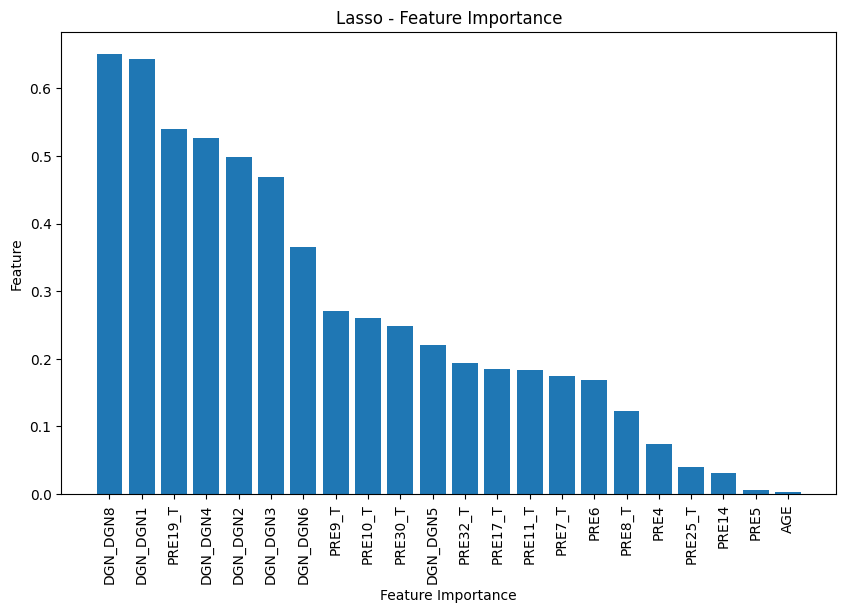

In [322]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.00001)
lasso.fit(data_train_balansed, target_train_balansed)

lasso_coef = np.abs(lasso.coef_)
pd_lasso = pd.DataFrame(lasso_coef, index=data_features.columns, columns=['coef'])
pd_lasso.sort_values(by='coef', ascending=False, inplace=True)

pyplot.figure(figsize=(10, 6))
pyplot.xticks(rotation=90)
pyplot.bar(pd_lasso.index, pd_lasso['coef'])
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Feature")
pyplot.title("Lasso - Feature Importance")
pyplot.show()


In [323]:
selected_features = lasso_coef >= 0.025

data_train_Lasso = pd.DataFrame(data_train_balansed, columns=data_features.columns)
data_train_Lasso = data_train_Lasso.loc[:, selected_features]

data_test_Lasso = pd.DataFrame(data_test_balansed, columns=data_features.columns)
data_test_Lasso = data_test_Lasso.loc[:, selected_features]

print("New number of features: ", data_train_Lasso.shape[1])

def lassoScore(estimator, modelName):
    model = estimator.fit(data_train_Lasso, target_train_balansed)
    prediction = model.predict(data_test_Lasso)
    print(f"Best {modelName} accuracy : ", accuracy_score(target_test_balansed, prediction, normalize=True))
    results[modelName]['Lasso'] = accuracy_score(target_test_balansed, prediction, normalize=True)

lassoScore(svc,'LinearSVC')
lassoScore(decisionTree,"DecisionTree")
lassoScore(rf_classifier,"Random Forest")
lassoScore(knn,"KNN")
lassoScore(xgb_model,"XGBoost")


New number of features:  20
Best LinearSVC accuracy :  0.86875
Best DecisionTree accuracy :  0.8
Best Random Forest accuracy :  0.875
Best KNN accuracy :  0.85
Best XGBoost accuracy :  0.825


In [324]:
pd.DataFrame.from_dict(results)

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.787234,0.808511,0.797872,0.797872,0.702128,0.819149
cross,0.851064,0.851064,0.844681,0.844681,0.838298,0.774468,0.838298
balanced,0.837500,0.900000,0.800000,0.812500,0.818750,0.850000,0.843750
balanced-cross,0.802500,0.897500,0.807500,0.807500,0.770000,0.840000,0.888750
f1,0.000000,0.095238,0.100000,0.173913,0.173913,0.125000,NaN
ROC,0.500000,0.519649,0.526316,0.539298,0.539298,0.479298,NaN
best,0.867018,NaN,0.866982,NaN,0.864386,0.869719,0.867018
pca,0.893750,0.893750,NaN,0.856250,NaN,0.850000,0.868750
Random Forest Feature Importance,0.843750,0.850000,NaN,NaN,NaN,0.831250,0.825000
XGBoost Feature Importance,0.737500,0.806250,NaN,NaN,NaN,0.768750,0.756250
